In [51]:
from collections import defaultdict
from peewee import SqliteDatabase, Model, IntegerField, BooleanField, DoubleField


db = SqliteDatabase('/tmp/foo.db')

class Timing(Model):
	block_size = IntegerField()
	file_size = IntegerField()
	compression = BooleanField()
	readahead = BooleanField()
	item_type = IntegerField()
	test = IntegerField()
	parameter = IntegerField()
	duration = DoubleField()
	timestamp = IntegerField()

	class Meta:
		database = db

In [140]:
Y_axis = 'duration'
X_axis = 'file_size'
others = ['block_size']
COLS = 1

timings = [
    ('tpie', '/home/asger/tmp/timing_tpie.db'),
    ('new', '/home/asger/tmp/timing_new.db'),
]

In [141]:
def get_rows(database):
    db.database = database
    db.connect()
    db.create_table(Timing, safe=True)
    
    rows = list(Timing.select())
    
    db.close()
    
    return rows

In [142]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

In [143]:
plot_values = defaultdict(lambda: defaultdict(list))

for name, database in timings:
    rows = get_rows(database)
    
    for r in rows:
        k = tuple(getattr(r, o) for o in others)
        plot_values[k][name].append((getattr(r, X_axis), getattr(r, Y_axis)))

PLOTS = len(plot_values)
ROWS = (PLOTS + COLS - 1) / COLS

<IPython.core.display.Javascript object>


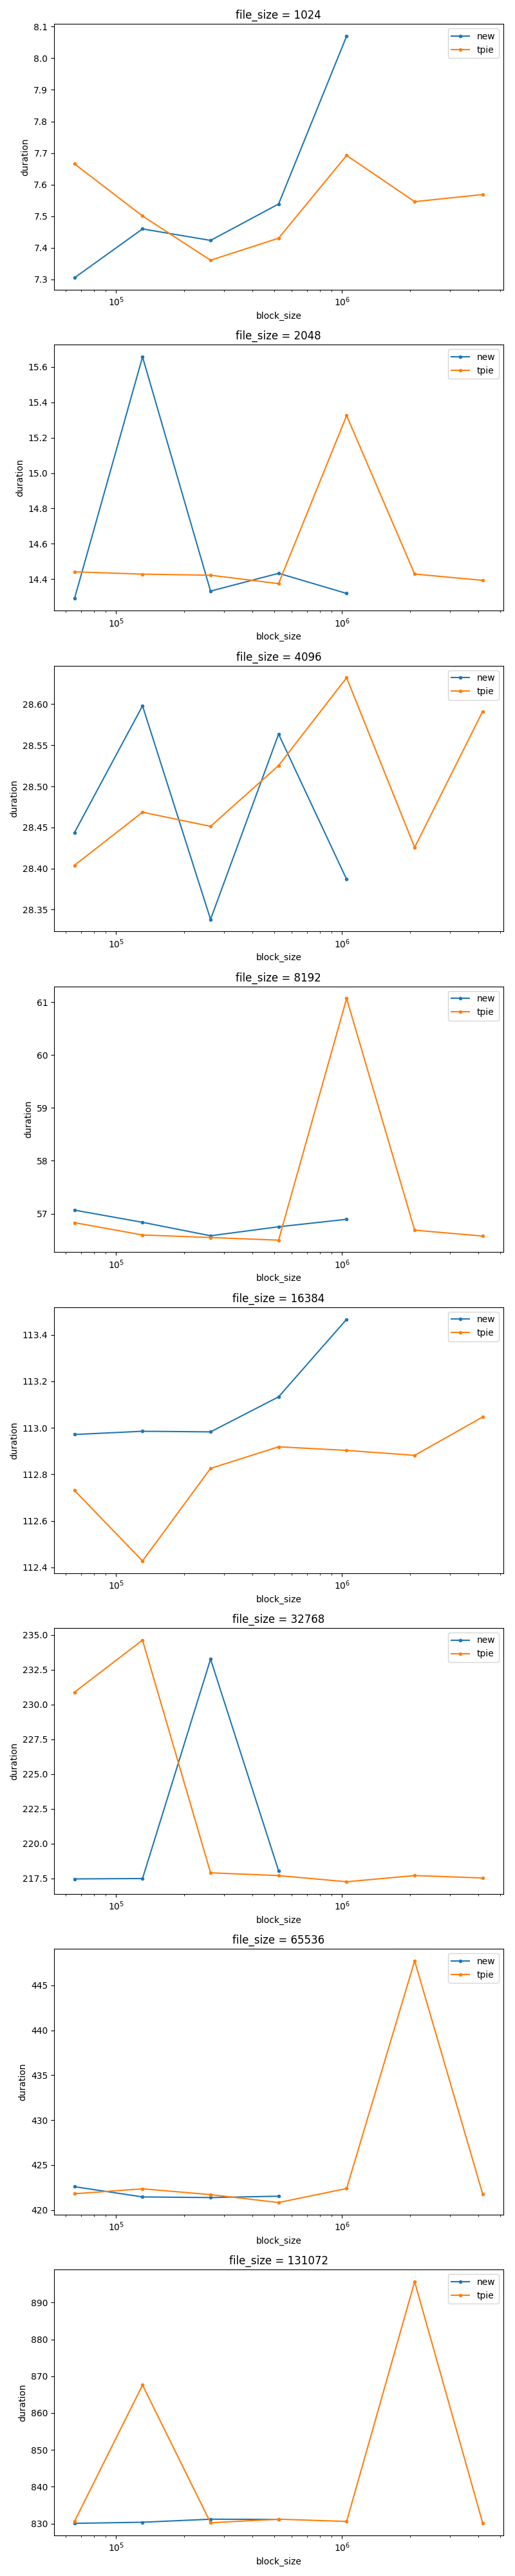

In [144]:
keys = sorted(plot_values.keys())

plt.figure(figsize=(8, 40))

for i, k in enumerate(keys):
    plt.subplot(ROWS, COLS, i + 1, title=', '.join(map(lambda x: '%s = %s' % (x[0], x[1]), zip(others, k))))
    for name, values in plot_values[k].items():
        x = list(map(lambda v: v[0], values))
        y = list(map(lambda v: v[1], values))
        
        plt.plot(x, y, '.-', label=name)
        plt.xlabel(X_axis)
        plt.ylabel(Y_axis)
        plt.xscale('log')
    
    plt.legend()

plt.tight_layout()
plt.show()